In [1]:
# Linear regression with pca

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:
data = np.zeros((3,10))

In [309]:
data[0] = np.arange(5, 25, 2)
data[1] = np.arange(5,25,2)

In [310]:
data

array([[ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.],
       [ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [311]:
data[:2] = data[:2] + np.random.uniform(low=-1., high=1., size=(2,10))

In [312]:
data

array([[ 4.27779685,  7.45298611,  9.24399322, 11.72223376, 13.95738974,
        15.80326767, 16.35729991, 18.51076063, 21.62783564, 22.43536492],
       [ 5.28311375,  6.65917954,  8.50144547, 10.28511224, 13.14314028,
        15.86336137, 16.37398736, 19.62466019, 20.13157401, 23.07324451],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

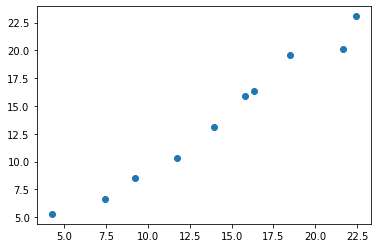

In [313]:
plt.scatter(*data[:2])

In [314]:
data[2] = np.arange(10)

In [348]:
data

array([[ 4.27779685,  7.45298611,  9.24399322, 11.72223376, 13.95738974,
        15.80326767, 16.35729991, 18.51076063, 21.62783564, 22.43536492],
       [ 5.28311375,  6.65917954,  8.50144547, 10.28511224, 13.14314028,
        15.86336137, 16.37398736, 19.62466019, 20.13157401, 23.07324451],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ]])

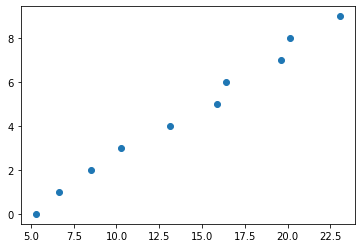

In [316]:
plt.scatter(*data[1:])

In [317]:
lr = LinearRegression()

In [332]:
X = data[:2]
X = X.transpose((1,0))

In [333]:
y = data[2]

In [334]:
X.shape, y.shape

((10, 2), (10,))

In [335]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
slope = lr.coef_
intercept = lr.intercept_

In [337]:
intercept, slope

(-2.5073559015752007, array([0.22335356, 0.27705603]))

In [338]:
def abline(slope, intercept, data):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = data[0]
    y_vals = intercept + slope * x_vals
    plt.scatter(*data)
    plt.plot(x_vals, y_vals, '--')

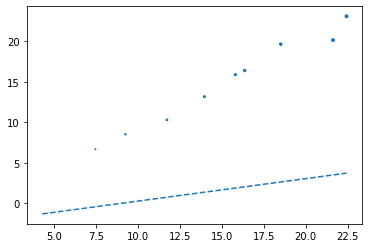

In [341]:
abline(slope[1], intercept, data)

In [351]:
lr.predict(np.array([[19,19]]))

array([7.00042644])

In [55]:
# Now lets try PCA

In [352]:
from sklearn.decomposition import PCA

In [353]:
pca = PCA(n_components=2)

In [355]:
dataT = data.transpose((1,0))

In [358]:
dataT

array([[ 4.27779685,  5.28311375,  0.        ],
       [ 7.45298611,  6.65917954,  1.        ],
       [ 9.24399322,  8.50144547,  2.        ],
       [11.72223376, 10.28511224,  3.        ],
       [13.95738974, 13.14314028,  4.        ],
       [15.80326767, 15.86336137,  5.        ],
       [16.35729991, 16.37398736,  6.        ],
       [18.51076063, 19.62466019,  7.        ],
       [21.62783564, 20.13157401,  8.        ],
       [22.43536492, 23.07324451,  9.        ]])

In [359]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 1.08224371e-32]


In [83]:
print(pca.singular_values_)

[2.19750880e+01 2.28608913e-15]


In [108]:
t = pca.transform(data)

In [109]:
t

array([[-1.62928793e+01, -3.57617323e-15],
       [ 1.62928793e+01,  4.02026244e-15]])

In [110]:
from sklearn.preprocessing import StandardScaler

In [119]:
x = StandardScaler().fit_transform([data[0]])

In [169]:
data

array([[0.        , 0.05923489, 0.11846978, 0.17770466, 0.23693955,
        0.29617444, 0.35540933, 0.41464421, 0.4738791 , 0.53311399],
       [0.09468475, 0.13327906, 0.20376008, 0.23967535, 0.28120212,
        0.32811101, 0.3365088 , 0.40655874, 0.43158674, 0.47199818]])

In [168]:
data[0] = data[0] / np.sqrt(np.sum(data[0]**2))
data[1] = data[1] / np.sqrt(np.sum(data[1]**2))
data[2] = data[2] / np.sqrt(np.sum(data[2]**2))

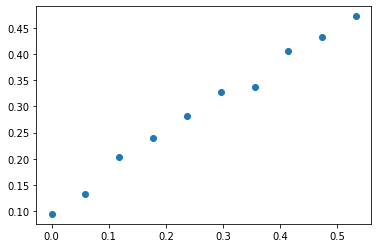

In [170]:
plt.scatter(*data)

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit(dataT)

/home/rohit/.local/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:456: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [146]:
pca.components_

array([[1., 0.],
       [0., 1.]])

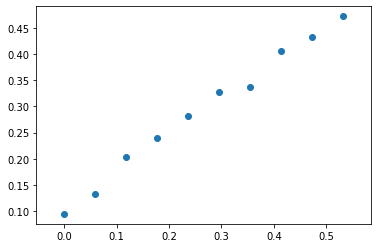

In [177]:
rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(dataT[:, 0], dataT[:, 1])
plt.axis('equal');

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataT)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [173]:
pca.components_

array([[-0.81855776, -0.57442423],
       [ 0.57442423, -0.81855776]])

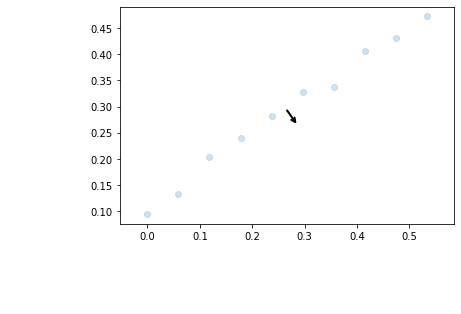

In [174]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(dataT[:, 0], dataT[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [176]:
dataT[:,1]

array([0.09468475, 0.13327906, 0.20376008, 0.23967535, 0.28120212,
       0.32811101, 0.3365088 , 0.40655874, 0.43158674, 0.47199818])

In [360]:
data[0] = data[0] - data[0].min()
data[0] /= data[0].max()
data[1] = data[1] - data[1].min()
data[1] /= data[1].max()
data[2] = data[2] - data[2].min()
data[2] /= data[2].max()

In [361]:
data

array([[0.        , 0.17486864, 0.27350559, 0.40999086, 0.53308862,
        0.63474749, 0.66525996, 0.78385848, 0.95552657, 1.        ],
       [0.        , 0.07734995, 0.18090546, 0.28116704, 0.44181949,
        0.59472568, 0.62342845, 0.80615183, 0.83464593, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [362]:
dataT = data.transpose((1,0))

In [365]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataT)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [367]:
x = pca.components_

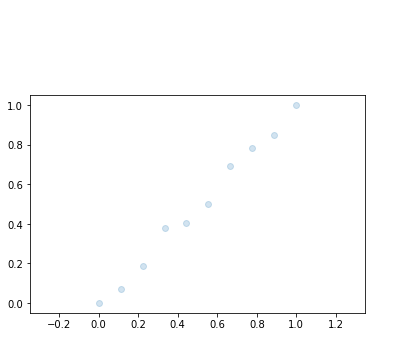

In [232]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(dataT[:, 0], dataT[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [236]:
slope = ()

In [237]:
intercept = 0

In [374]:
data[0],data[1], data[2], x

(array([0.        , 0.17486864, 0.27350559, 0.40999086, 0.53308862,
        0.63474749, 0.66525996, 0.78385848, 0.95552657, 1.        ]),
 array([0.        , 0.07734995, 0.18090546, 0.28116704, 0.44181949,
        0.59472568, 0.62342845, 0.80615183, 0.83464593, 1.        ]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([[-0.56569993, -0.58819844, -0.57793268],
        [-0.74331036,  0.6671831 ,  0.04854294]]))

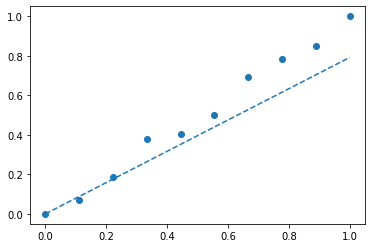

In [239]:
axes = plt.gca()
x_vals = data[0]
x_vals.shape
y_vals = intercept + slope*x_vals
plt.scatter(*data)
plt.plot(x_vals, y_vals, '--')

In [370]:
a = 23*x[0] + 23*x[1]

In [371]:
a

array([-30.10723657,   1.81664719, -12.175964  ])